In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import peak_widths
%matplotlib nbagg

In [24]:
source="Ba-133"
file_name=source+"_spectrum.npy"
spectrum=np.load(file_name)


<IPython.core.display.Javascript object>


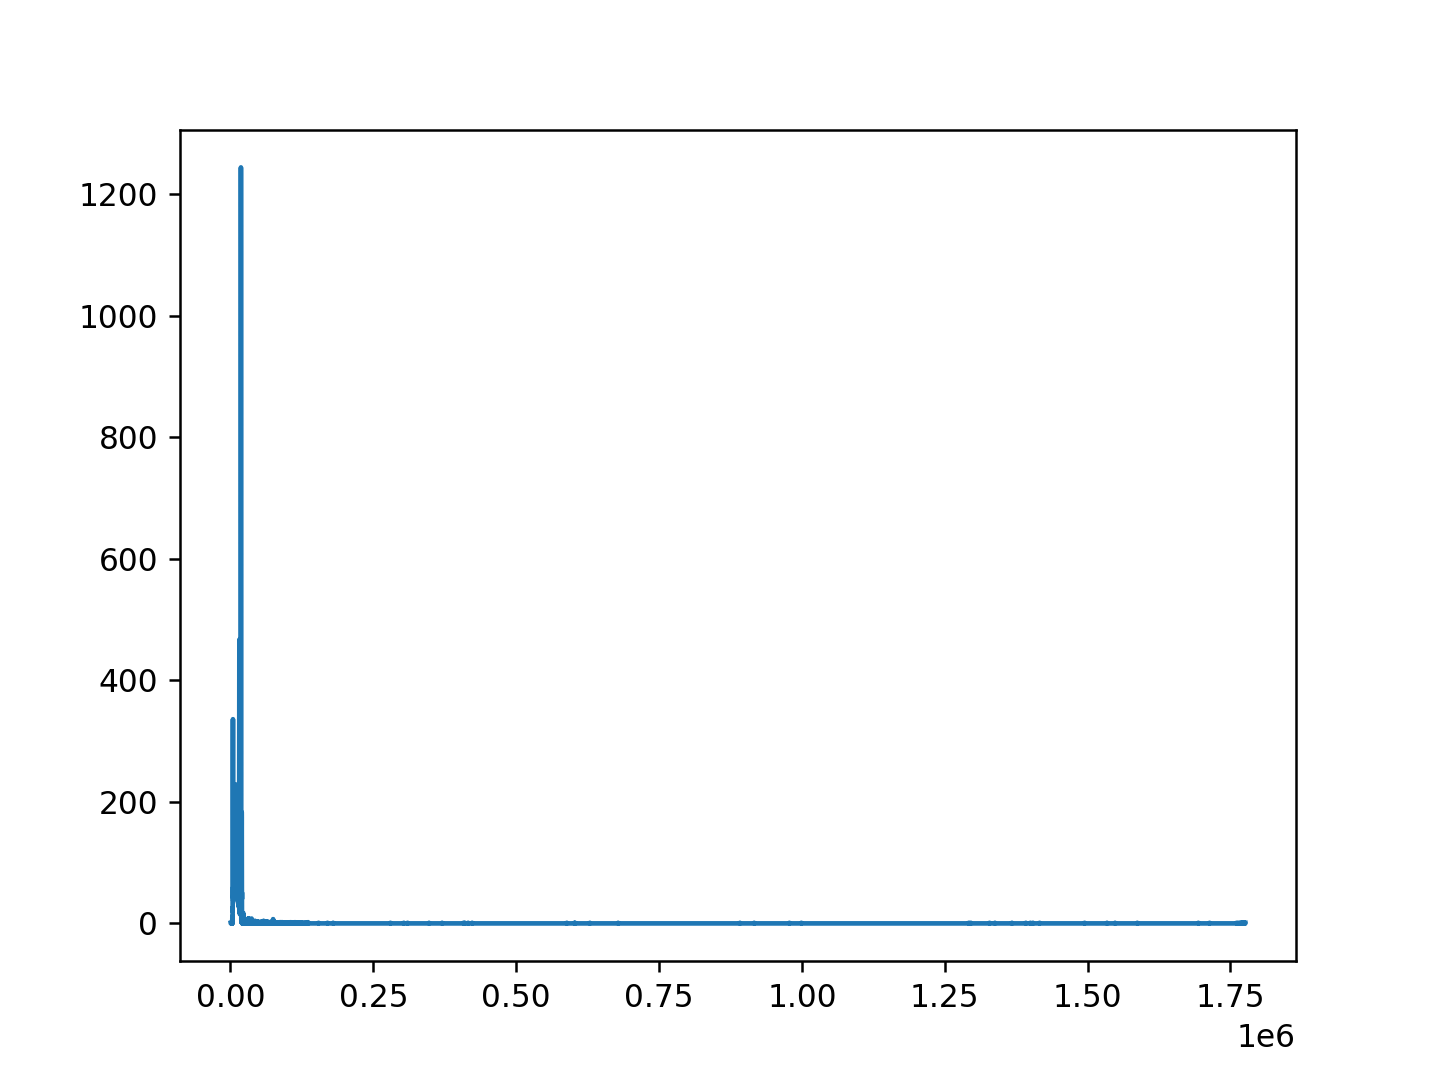

In [25]:
hist_values,hist_bins=np.histogram(spectrum,bins=100000)
hist_bins=0.5*(hist_bins[1:]+hist_bins[:-1])

plt.figure("Uncalibrated Spectrum")
plt.plot(hist_bins,hist_values)
# plt.yscale("log")


In [4]:
num_peaks=1
peak_energies=np.array([356]) #in keV
fa_peaks=np.zeros(num_peaks) #full-absorption peaks
peak_indices=np.zeros(num_peaks)

peaks,prominences=find_peaks(hist_values,prominence=0)
prominences=prominences["prominences"]
peaks_to_keep=np.flip(np.argsort(prominences))[0:num_peaks]

for i in range(0,np.size(peaks_to_keep)):
    peak_indices[i]=peaks[peaks_to_keep[i]]
    fa_peaks[i]=hist_bins[int(peak_indices[i])]
sort_indices=np.argsort(peak_indices.astype(int))
peak_indices=peak_indices[sort_indices].astype(int)
peak_channels=fa_peaks[sort_indices]

peak_fwhm,_,_,_=peak_widths(hist_values,peak_indices)



spectrum_information=np.vstack((peak_energies,peak_channels))
spectrum_information=np.vstack((spectrum_information,peak_indices))
spectrum_information=np.vstack((spectrum_information,peak_fwhm))

print(spectrum_information)

[[  356.        ]
 [26212.88490101]
 [ 1323.        ]
 [   26.86688181]]


In [5]:
# try:
#     calib_peaks=np.load("Channel_calibration.npy")
#     calib_peaks=np.hstack((calib_peaks,spectrum_information))
#     calib_peaks=np.sort(calib_peaks)
# except:
#     calib_peaks=spectrum_information[:]
# np.save("Channel_calibration.npy",calib_peaks)

calib_peaks=np.load("Channel_calibration.npy")

In [6]:
#create linear fit

#calib peaks information:
#Row 0: peak energies
#Row 1: peak channel indices in values returned by pulse analysis
#Row 2: peak channel indices 
#Row 3: peak FWHM in channel number

coeff=np.polyfit(calib_peaks[1],calib_peaks[0],1)
spectrum_energy=coeff[0]*hist_bins+coeff[1]
peak_energies=calib_peaks[1]*coeff[0]+coeff[1]
fwhm_energies=calib_peaks[3]*coeff[0]

fwhm_fit=np.polyfit(calib_peaks[2],calib_peaks[0],1)

fwhm_energies=fwhm_fit[0]*calib_peaks[3]

print(fwhm_energies)
print(coeff[0])
print(calib_peaks)

[9.25460204 9.55512643 9.56491048 9.92691686]
0.01957978498038657
[[3.56000000e+02 6.62000000e+02 1.17320000e+03 1.33250000e+03]
 [1.82904734e+04 3.38480787e+04 5.99744407e+04 6.81631391e+04]
 [1.00500000e+03 1.77000000e+03 3.23600000e+03 3.69800000e+03]
 [2.57047540e+01 2.65394636e+01 2.65666389e+01 2.75721154e+01]]


<IPython.core.display.Javascript object>


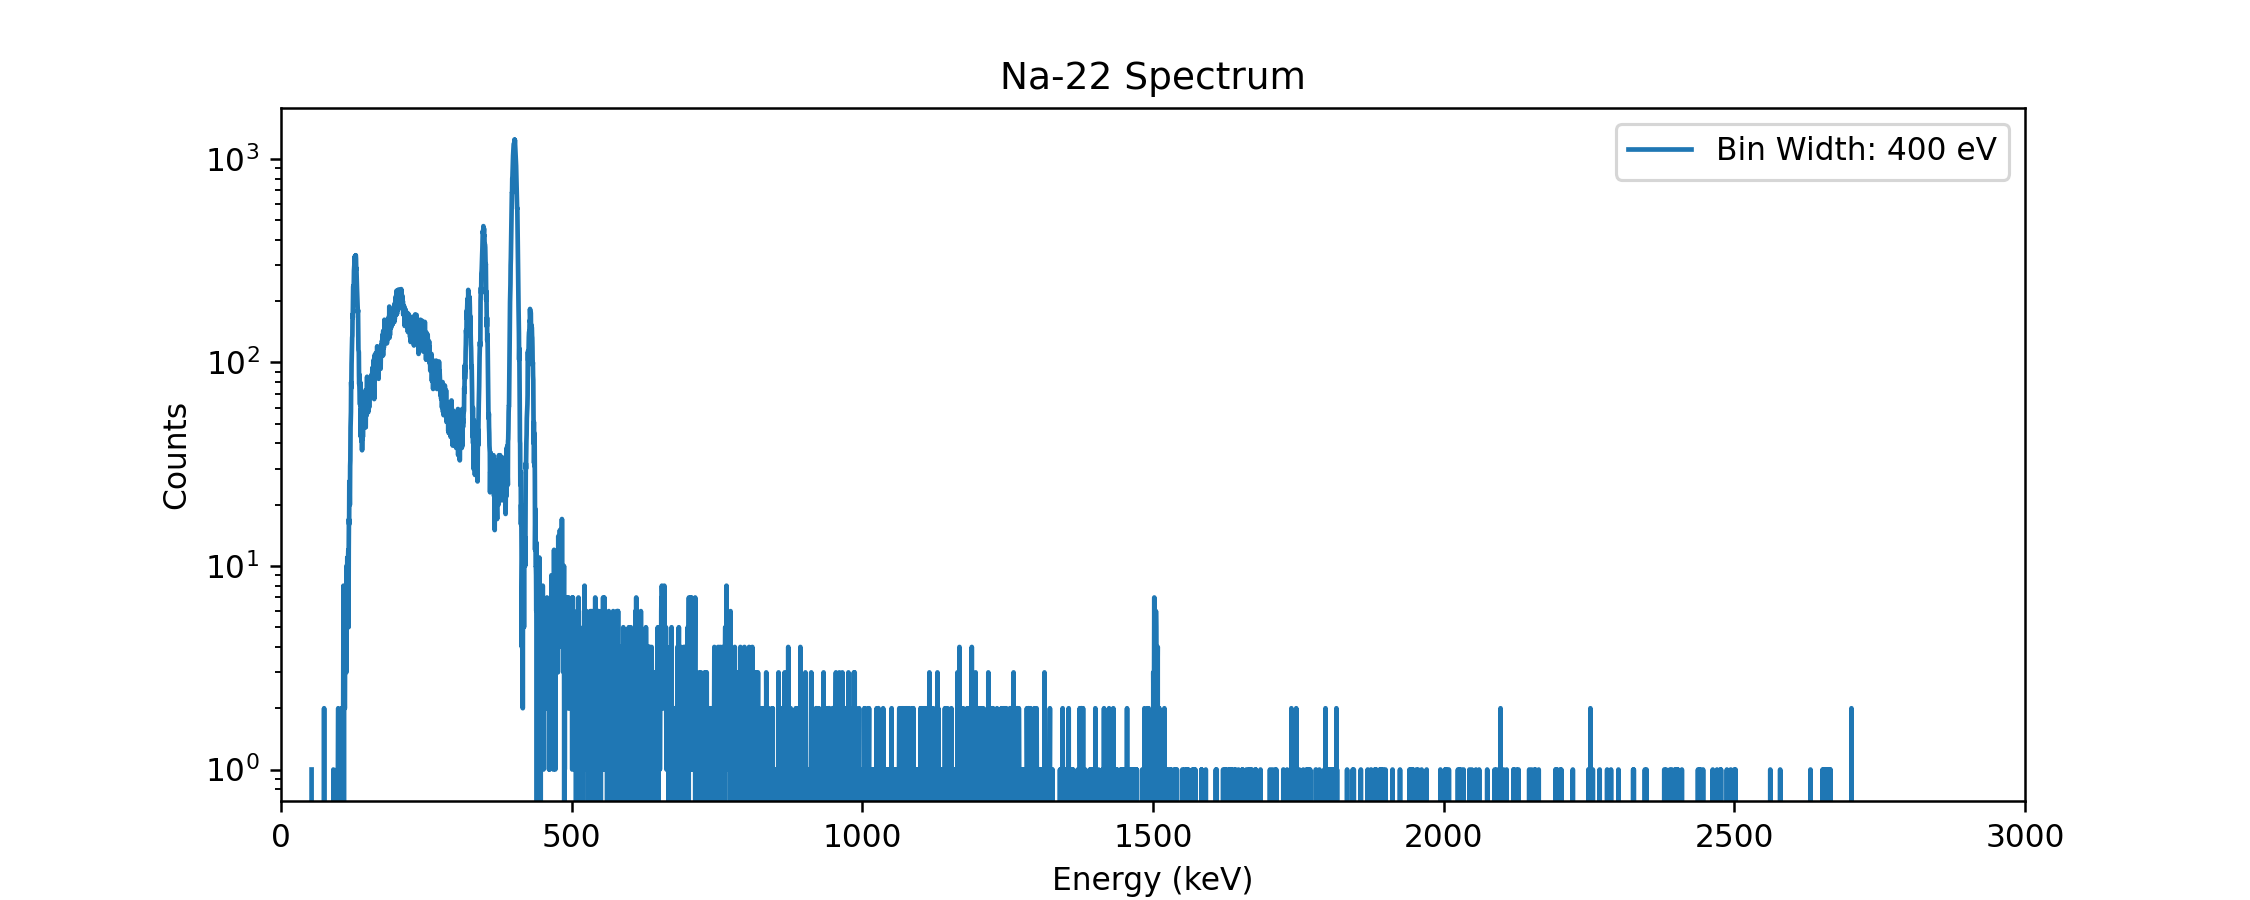

In [26]:
plt.figure("Isotope Spectrum",figsize=(10,4))
plt.plot(spectrum_energy,hist_values)
plt.title("Energy Spectra Spectrum")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.legend(["Bin Width: 400 eV"])
plt.xlim([0,3000])
plt.yscale('log')



<IPython.core.display.Javascript object>


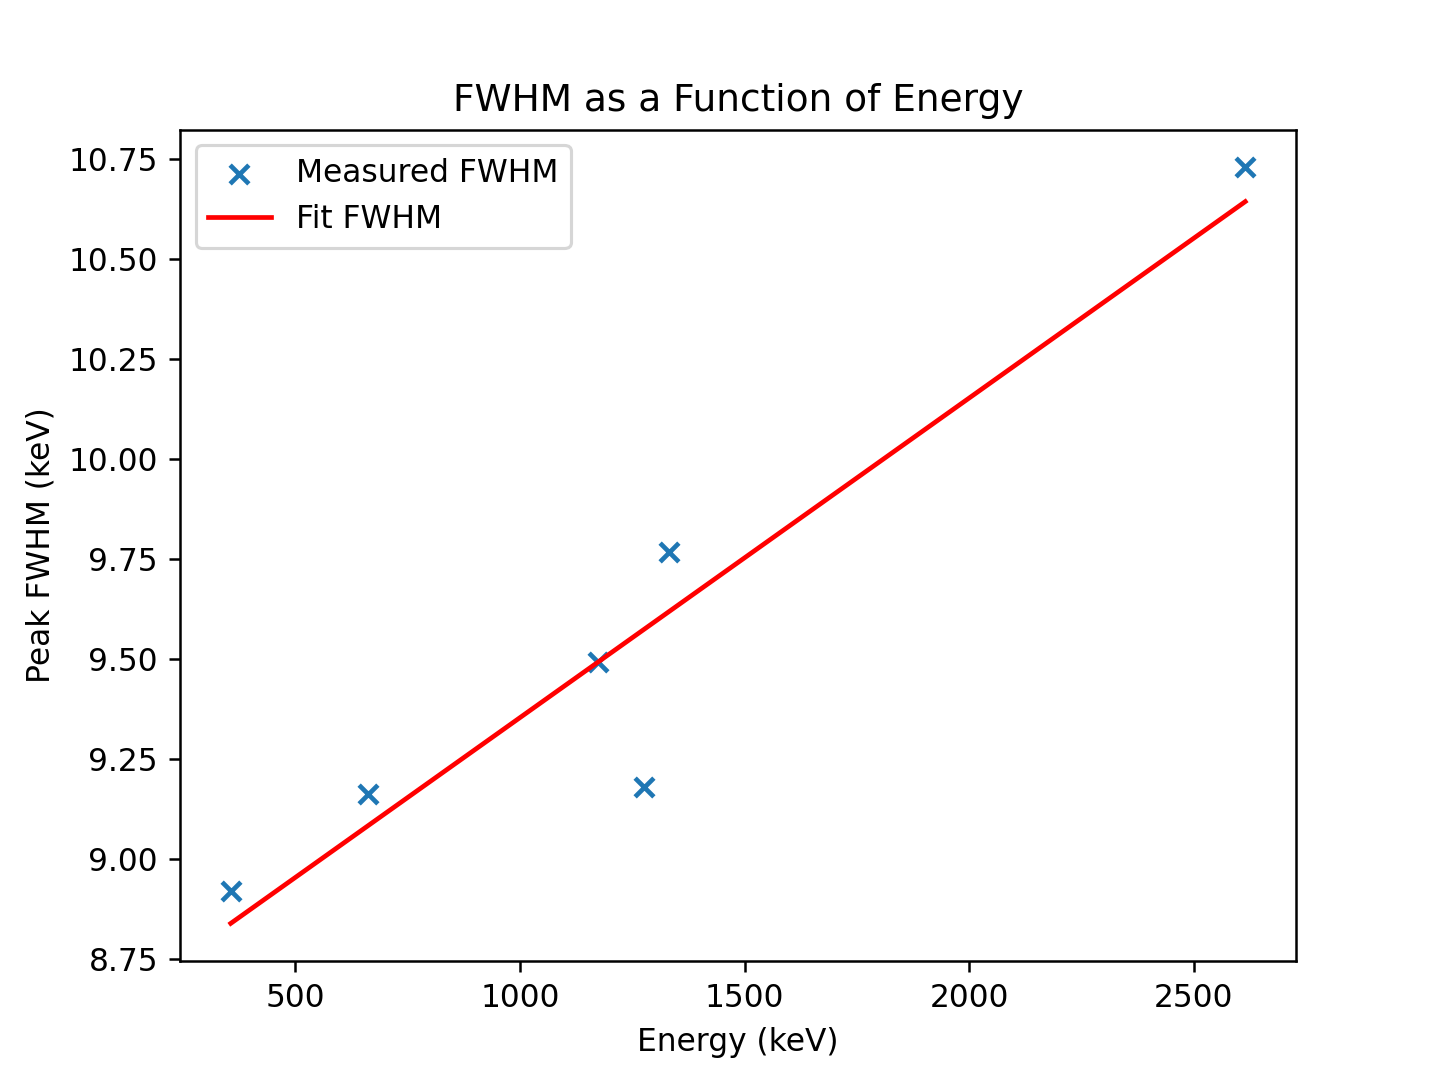

In [19]:
FWHM=np.array([9.4910925,9.76650137,9.162,10.73,9.18,8.919]) #keV
ENERGY=np.array([1173.2,1332.5,662,2614.5,1275,356]) #keV
sort_indices=np.argsort(ENERGY)
ENERGY=ENERGY[sort_indices]
FWHM=FWHM[sort_indices]
plt.figure("FWHM")
plt.scatter(ENERGY,FWHM,marker='x')
plt.xlabel("Energy (keV)")
plt.ylabel("Peak FWHM (keV)")
plt.title("FWHM as a Function of Energy")

fwhm_fit=np.polyfit(ENERGY,FWHM,1)
plt.plot(ENERGY,ENERGY*fwhm_fit[0]+fwhm_fit[1],color='red')
plt.legend(["Measured FWHM","Fit FWHM"])


<IPython.core.display.Javascript object>


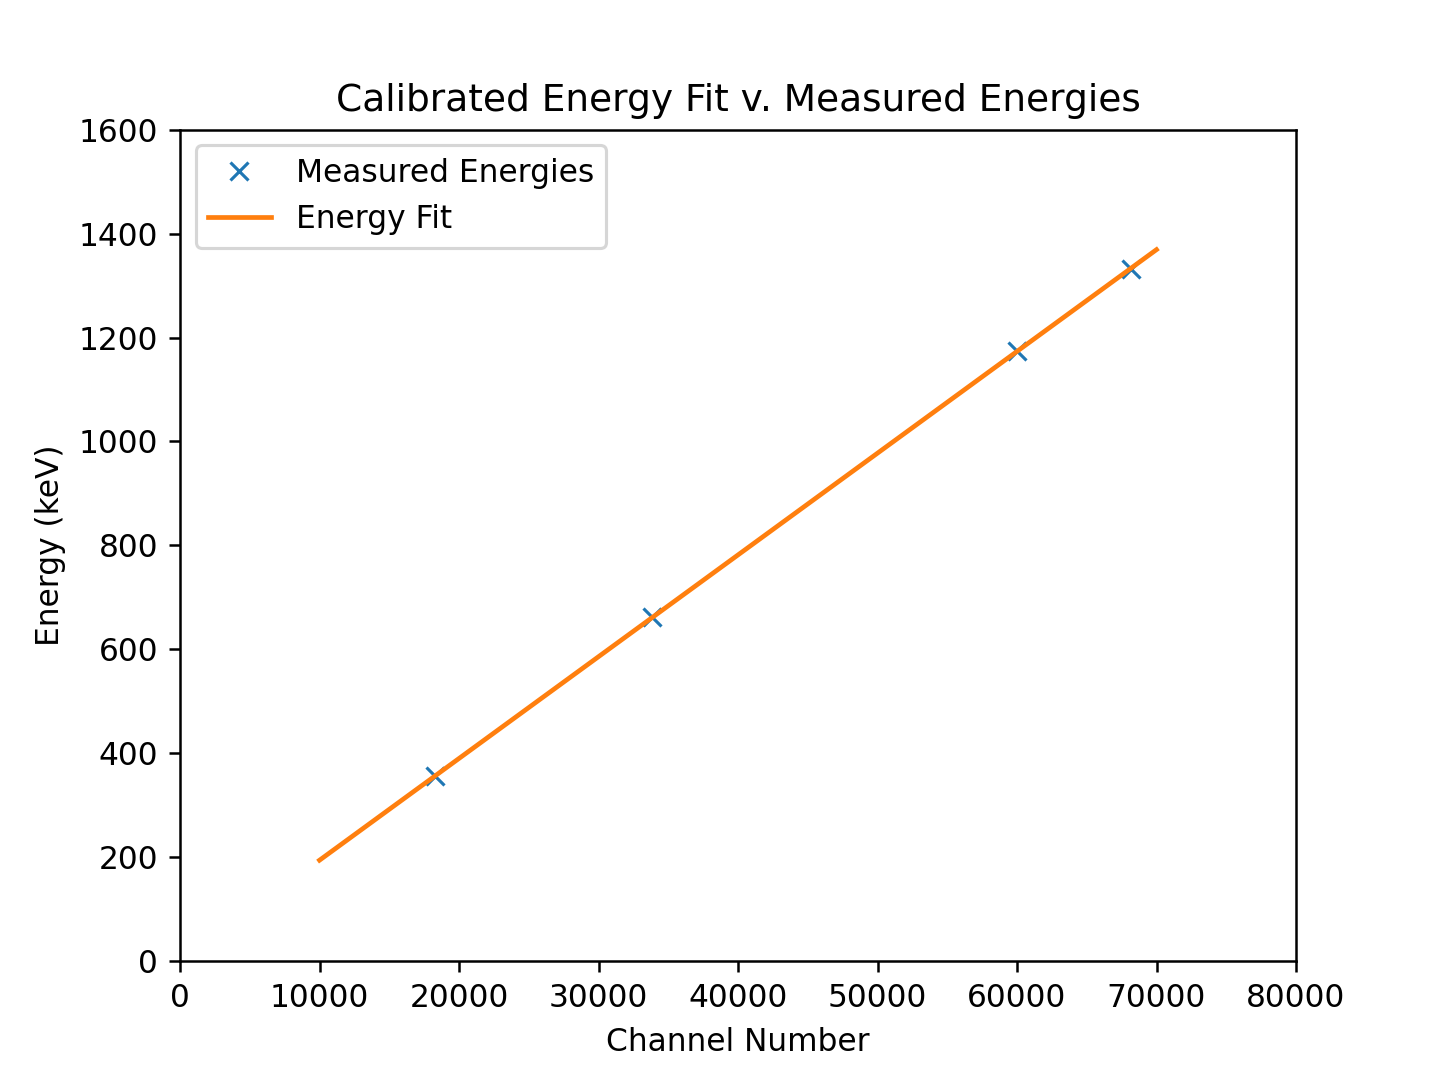

Text(0.5, 1.0, 'Calibrated Energy Fit v. Measured Energies')

In [9]:
measured_energies=calib_peaks[0]
channels=calib_peaks[1]
energy_fit=np.array([10000,70000])*coeff[0]+coeff[1]
plt.figure("Energy Fit Check")
plt.plot(channels,measured_energies,linestyle='None',marker='x')
plt.plot(np.array([10000,70000]),energy_fit)
plt.xlim([0,80000])
plt.ylim([0,1600])
plt.legend(["Measured Energies","Energy Fit"],loc='upper left')
plt.xlabel("Channel Number")
plt.ylabel("Energy (keV)")
plt.title("Calibrated Energy Fit v. Measured Energies")

<IPython.core.display.Javascript object>


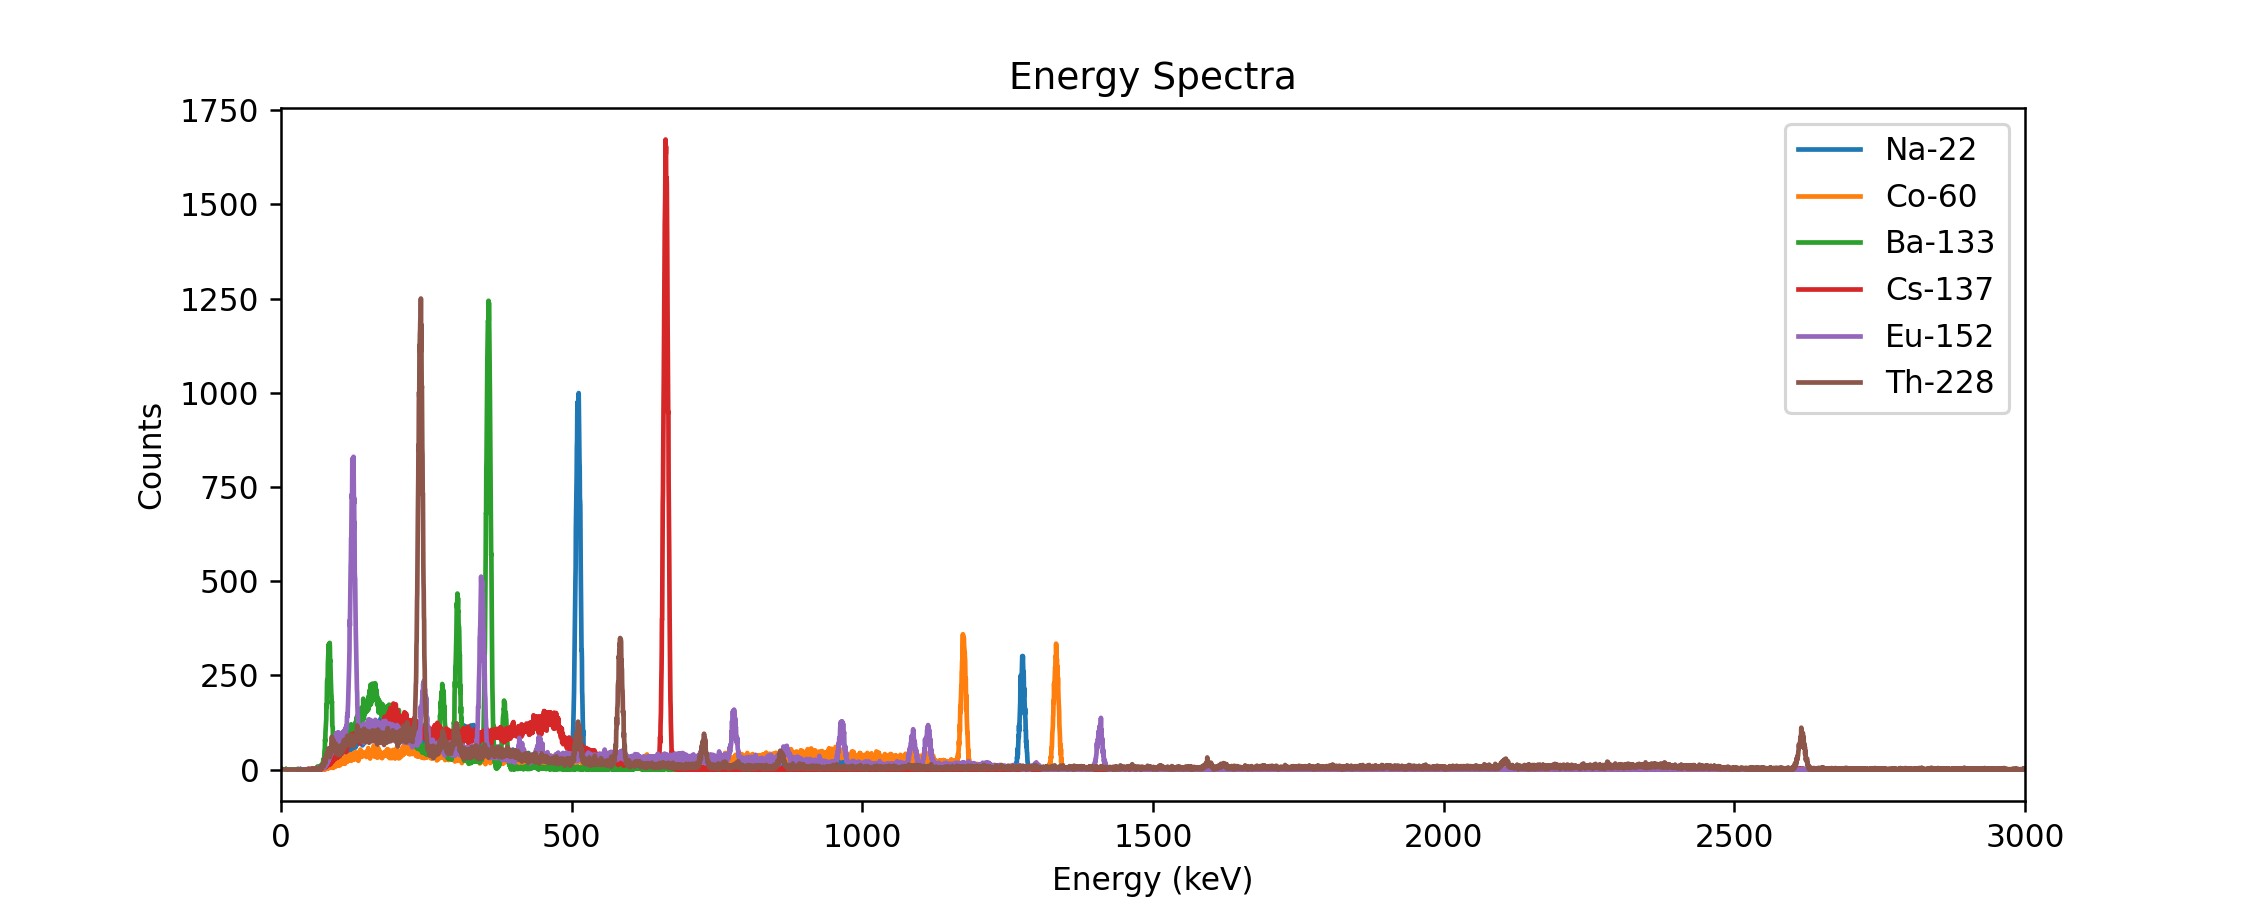

Text(0.5, 1.0, 'Energy Spectra')

In [41]:
x1=np.load("Na-22_spectrum.npy")
x2=np.load("Co-60_spectrum.npy")
x3=np.load("Ba-133_spectrum.npy")
x4=np.load("Cs-137_spectrum.npy")
x5=np.load("Eu-152_spectrum.npy")
x6=np.load("Th-228_spectrum.npy")

val1,bin1=np.histogram(x1,bins=100000)
bin1=0.5*(bin1[1:]+bin1[:-1])

val2,bin2=np.histogram(x2,bins=100000)
bin2=0.5*(bin2[1:]+bin2[:-1])

val3,bin3=np.histogram(x3,bins=100000)
bin3=0.5*(bin3[1:]+bin3[:-1])

val4,bin4=np.histogram(x4,bins=100000)
bin4=0.5*(bin4[1:]+bin4[:-1])

val5,bin5=np.histogram(x5,bins=100000)
bin5=0.5*(bin5[1:]+bin5[:-1])

val6,bin6=np.histogram(x6,bins=100000)
bin6=0.5*(bin6[1:]+bin6[:-1])

e1=coeff[0]*bin1+coeff[1]
e2=coeff[0]*bin2+coeff[1]
e3=coeff[0]*bin3+coeff[1]
e4=coeff[0]*bin4+coeff[1]
e5=coeff[0]*bin5+coeff[1]
e6=coeff[0]*bin6+coeff[1]

plt.figure("All Spectra", figsize=(10,4))
plt.plot(e1,val1)
plt.plot(e2,val2)
plt.plot(e3,val3)
plt.plot(e4,val4)
plt.plot(e5,val5)
plt.plot(e6,val6)
plt.xlim([0,3000])
plt.legend(["Na-22","Co-60","Ba-133","Cs-137","Eu-152","Th-228"])

plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.title("Energy Spectra")
